### This jupyter notebook is to unit-test CFE model run

## Preparation

In [4]:
# Import modules
import sys
import json
from bmi_cfe import BMI_CFE

In [5]:
# Input: Mahurangi data for 3 yrs
# forcing: Mahurangi/mahurangi_1998_2001.csv
# observed: test_sm_basinavg

# Input: Little Washita data for 12 yrs
# forcing: LittleWashita/little_washita_2006_2012.csv
# observed: test_sm_basinavg


# Parameter: only limited number of parameters

input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/LittleWashita/little_washita_2006_2012.csv",
    "catchment_area_km2": 601,
    "soil_params": {
        "bb": 8.17,
        "satdk": 2.45E-06,
        "slop": 0.147,
        "satpsi": 0.263,
        "smcmax": 0.5,
        "wltsmc": 0.05,
        "D": 2
    },
    "max_gw_storage": 50,
    "Cgw": 1,
    "expon": 0.05,
    "K_lf": 0.17,
    "K_nash": 0.03,
    "trigger_z_fact": 0.25,
    "alpha_fc": 0.33,
    "refkdt": 3,
    "nash_storage": [
        0.0,
        0.0
    ],
    "giuh_ordinates": [
        0.1,
        0.4,
        0.2,
        0.2,
        0.1
    ],
    "stand_alone": 1,
    "unit_test": 1,
    "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/LittleWashita/test_sm_basinavg.csv"
}

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

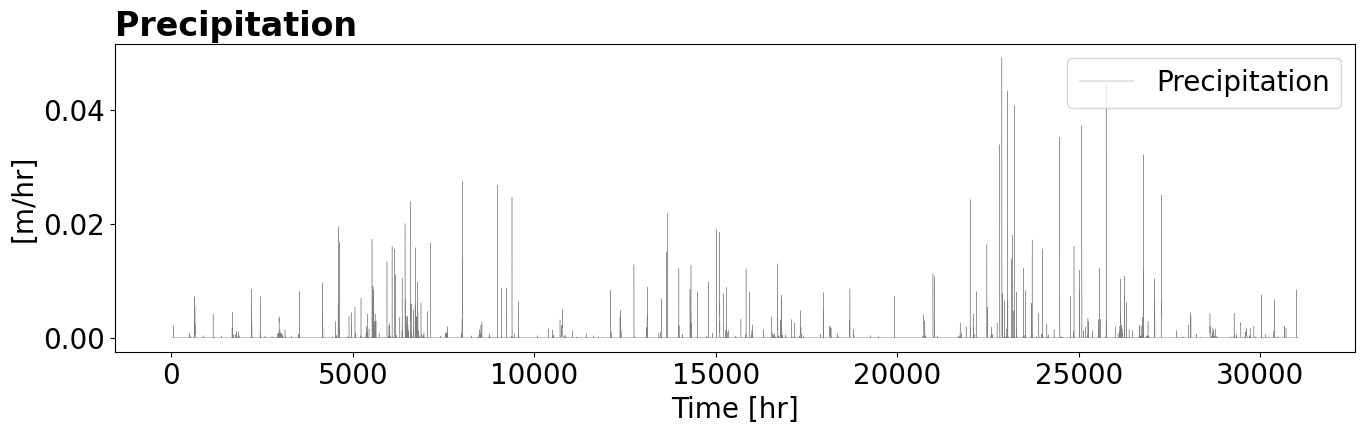

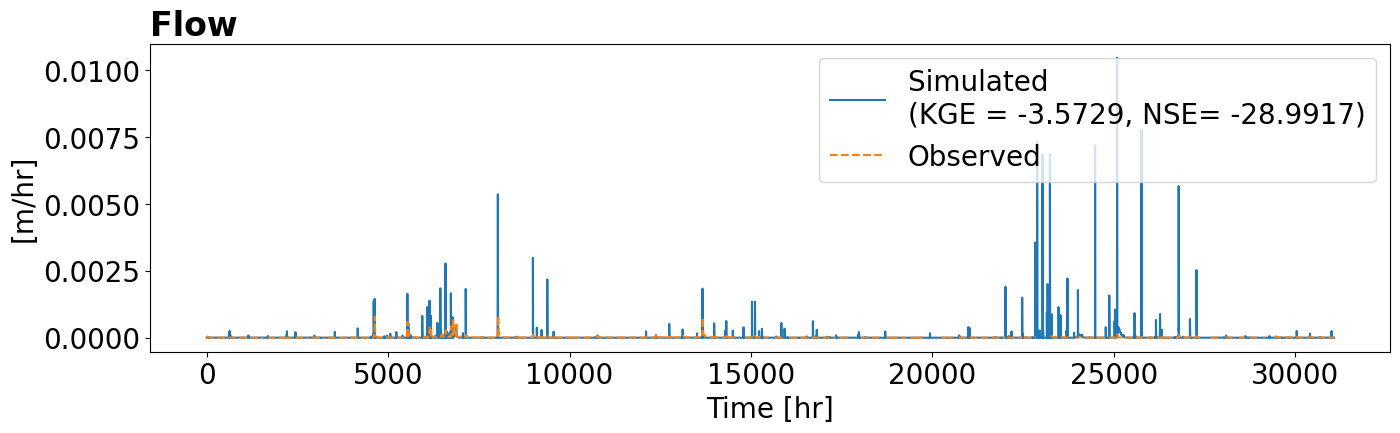

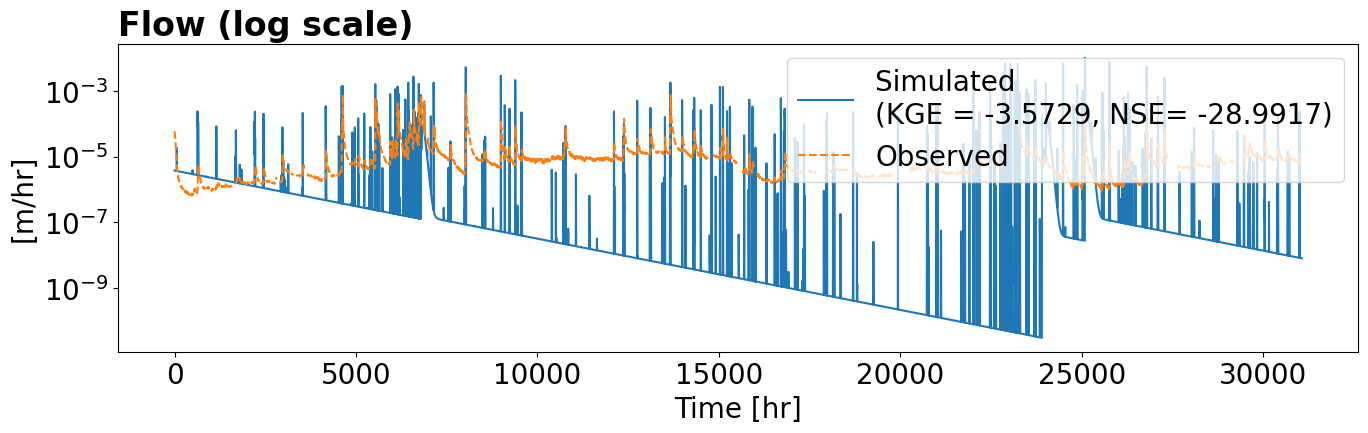

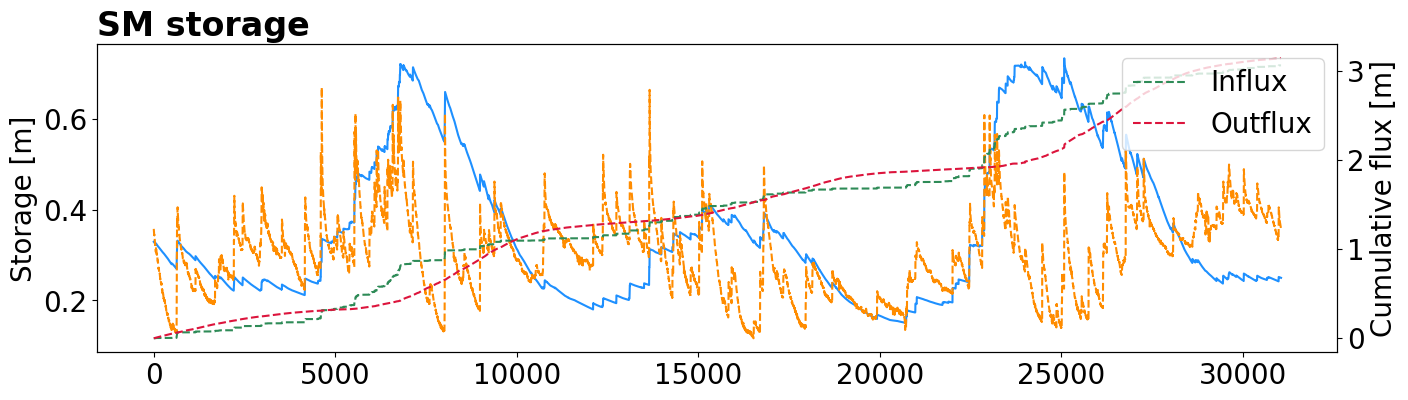

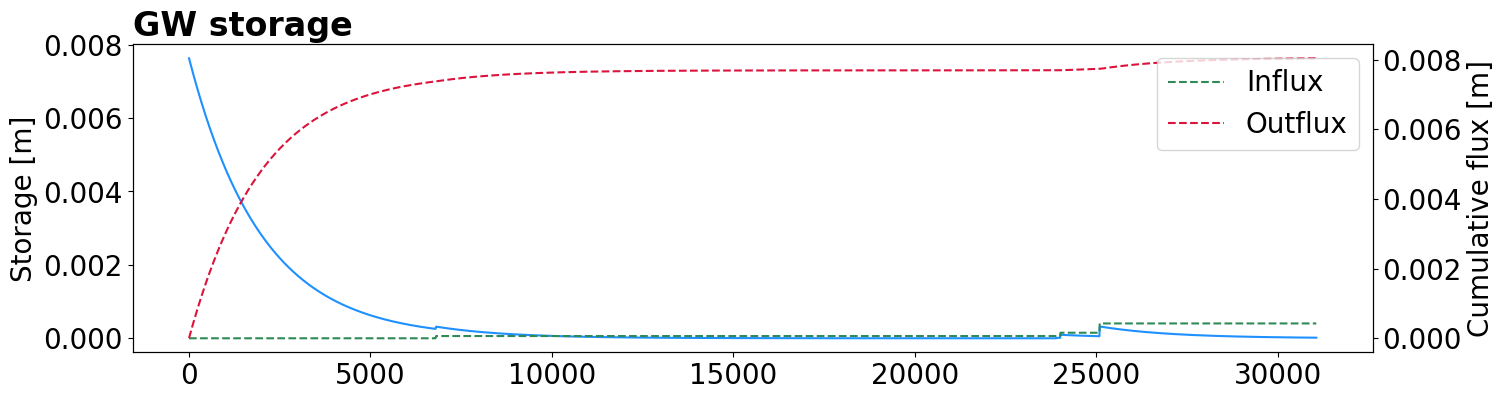

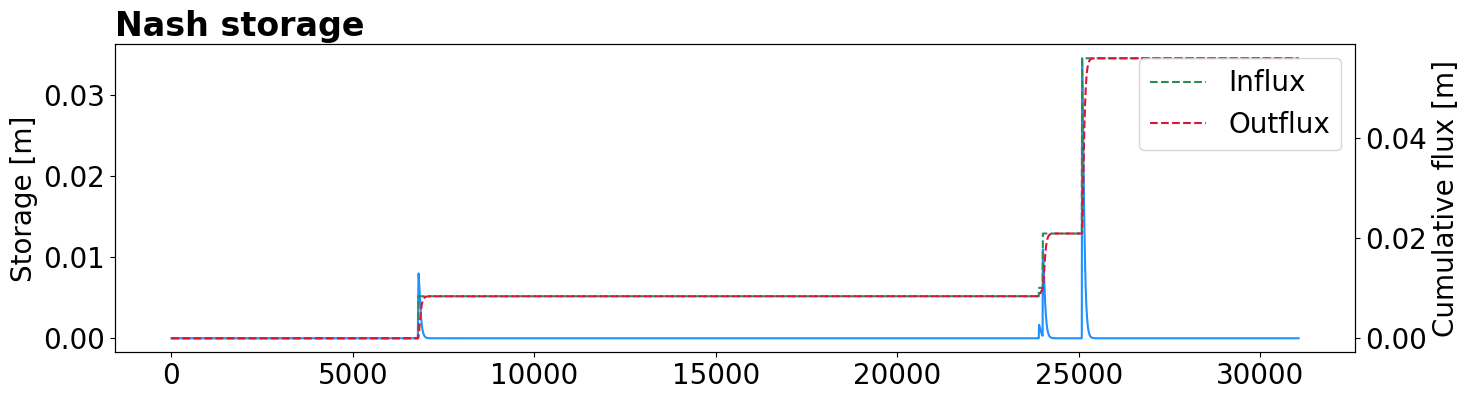

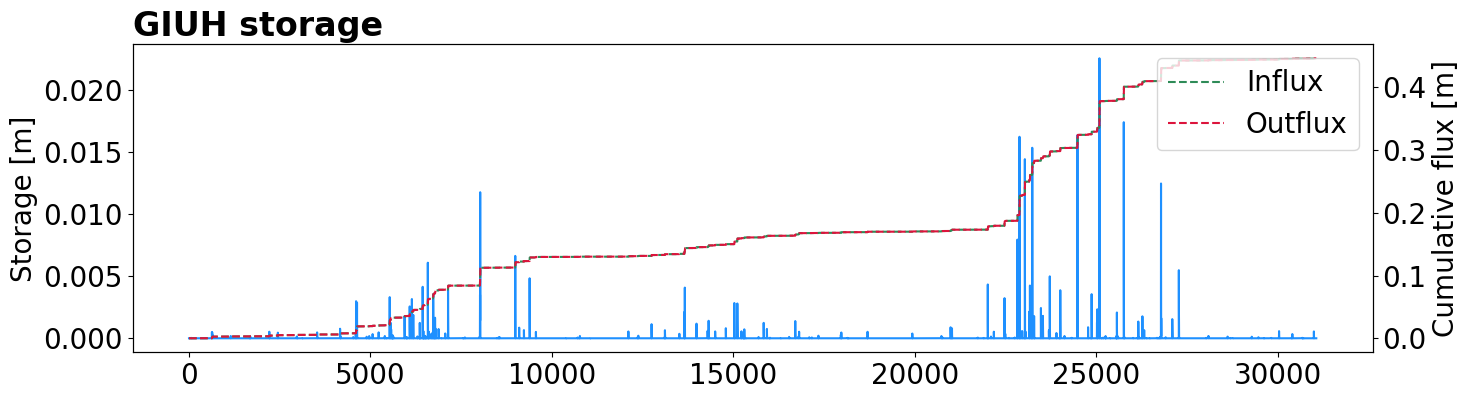


GLOBAL MASS BALANCE
  initial volume:  51.0000
    volume input:   7.9287
   volume output:  58.6599
    final volume:   0.2688
        residual: 1.1981e-05

 AET & PET
      volume PET:  18.8975
      volume AET:   7.4987
ET from rainfall:   0.8735
    ET from soil:   6.6252

SCHAAKE MASS BALANCE
    volume input:   7.9287
ET from rainfall:   0.8735
  surface runoff:   0.7832
             IOF:   0.7822
             SOF:   0.0010
    infiltration:   6.2721
schaake residual: -1.5099e-14

GIUH MASS BALANCE
  vol. into giuh:   0.7832
   vol. out giuh:   0.7832
 vol. end giuh q:   0.0000
   giuh residual: 0.0000e+00

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   1.0000
  vol. into soil:   6.2721
vol.soil2latflow:   0.3762
 vol. soil to gw:   0.0019
 vol. soil to ET:   6.6252
 final vol. soil:   0.2688
vol. soil resid.: 1.1981e-05

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   0.3762
  vol. from nash:   0.3762
 final vol. nash:   0.0000
nash casc res

In [6]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(plot=True, print_fluxes=False, warm_up=True)
cfe_instance.finalize(print_mass_balance=True)